# Written text as operational data

Written text is one type of data

### Why people write?

 - To communicate: their thoughts, feelings, urgency, needs, information

### Why people communicate?

1. To express emotions
1. To share information
1. To enable or elicit an action
1. ...

### We will use written text for the purpose other than 
1. To experience emotion
1. To learn something the author intended us to learn
1. To do what the author intended us to do

### Instead, we will use written text to recognize who wrote it
 - By calculating and comparing word frequencies in written documents
 
See, for example, likely fictional story https://medium.com/@amuse/how-the-nsa-caught-satoshi-nakamoto-868affcef595

### Example 1. Dictionaries in python (associative arrays)

Plot the frequency distribution of words on a web page.

In [1]:
import requests, re
# re is a module for regular expressions: to detect various combinations of characters
import operator


# Start from a simple document
r = requests .get('https://americanfootballdatabase.fandom.com/wiki/American_football_rules')

# What comes back includes headers and other HTTP stuff, get just the body of the response
t = r.text

# obtain words by splitting a string using as separator one or more (+) space/like characters (\s) 

wds = re.split('\s+', t)


# now populate a dictionary (wf)
wf = {}
for w in wds:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf[w] = 1

# dictionaries can not be sorted, so lets get a sorted *list*        
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   

# lets just have no more than 15 words 
ml = min(len(wfs),15)
for i in range(1,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))  

the	786
1	589
a	275
of	272
<a	237
is	185
<li><a	179
to	165
in	145
and	142
</a>	129
<div	128
or	119
</li>	119


### Example 2

Lots of markup in the output, lets remove it --- 

use BeautifulSoup and nltk modules and practice some regular expressions.

In [2]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', '', ',', '--', '–', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),20)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        
# Now populate two lists    
(wf_ee, tw_ee) = get_wf('https://americanfootballdatabase.fandom.com/wiki/American_football_rules')
(wf_bu, tw_bu) = get_wf('http://myyouthbaseball.com/basic-baseball-rules.html')

print(wf_ee)
print(wf_bu)

[('player', 28), ('possession', 29), ('teams', 31), ('rules', 35), ('goal', 37), ('first', 40), ('touchdown', 40), ('zone', 41), ('nfl', 43), ('kick', 44), ('field', 44), ('overtime', 54), ('end', 56), ('football', 56), ('line', 61), ('game', 61), ('may', 62), ('play', 64), ('team', 110), ('ball', 123)]
[('strike', 8), ('called', 8), ('drills', 9), ('get', 10), ('may', 10), ('foul', 10), ('run', 11), ('hit', 11), ('team', 11), ('second', 12), ('home', 12), ('third', 13), ('first', 16), ('basic', 17), ('batter', 20), ('runner', 21), ('rules', 24), ('ball', 31), ('baseball', 51), ('base', 60)]


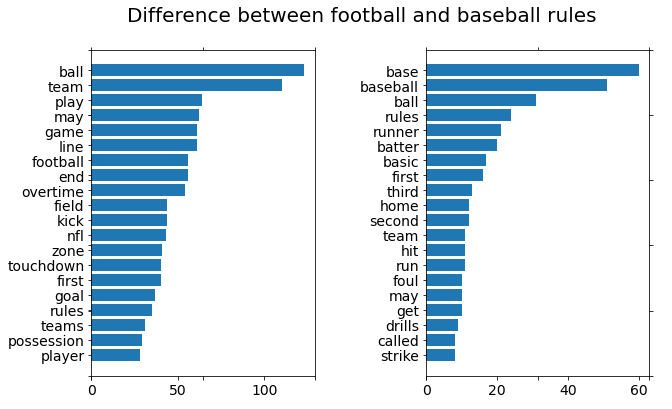

In [3]:
#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

plotTwoLists (wf_ee, wf_bu, 'Difference between football and baseball rules')

In [4]:
#In case Project gutenberg is blocked you can download text to your laptop and copy to the docker container via scp
#Assuming the file name you copy is pg4680.txt here is how you change the script
# Please note the option errors='replace'
# without it python invariably runs into unicode errors
f = open ('pg4680.txt', 'r', encoding="ascii", errors='replace')
    
# What comes back includes headers and other HTTP stuff, get just the body of the response
t = f.read()

# obtain words by splitting a string using as separator one or more (+) space/like characters (\s) 
wds = re.split('\s+',t)

# now populate a dictionary (wf)
wf = {}
for w in wds:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf [w] = 1

# dictionaries can not be sorted, so lets get a sorted *list*        
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   

# lets just have no more than 15 words 
ml = min(len(wfs),15)
for i in range(1,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))  

and	2836
of	2676
to	2646
a	2217
in	1422
his	1205
he	928
that	920
was	823
for	798
with	797
as	672
I	505
you	497


# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

# Comparing Word Usage Between a Football Rulebook and a Basketball Rulebook

My goal was to compare two different sports rulebooks to see the similarities and differences between two rulebooks of two different sports.

I chose to compare a PDF file of a football rulebook and a PDF file of a basketball rulebook.

My results are presented at the end of my code.

In [5]:
# In this section of my code, I use the PyPDF2 PdfFileReader
# to get and store the two PDF rulebooks as objects.

# Used pip install PyPDF2 in the terminal to use the PDF functions.

In [6]:
import io
import requests

from PyPDF2 import PdfFileReader, PdfFileWriter

football_url = 'https://www.dfoa.com/wp-content/uploads/2021/07/2021-NCAA-FB-Rulebook.pdf'
basketball_url = 'https://www.quickscores.com/downloads/ftmeadesports_20212022_NCAA_Mens_Basketball_Rulebook.pdf'

r_football = requests.get(football_url)
f_football = io.BytesIO(r_football.content)

reader_football = PdfFileReader(f_football, strict = False)

r_basketball = requests.get(basketball_url)
f_basketball = io.BytesIO(r_basketball.content)

reader_basketball = PdfFileReader(f_basketball, strict = False)

In [7]:
# In this section of my code, I loop through each page
# of each PDF, storing the text contents. Then, I store
# each specific word into a dictionary and use some of the
# cleaning functions used above to remove stop words
# and other unnecessary symbols or characters.

In [8]:
wf_football = {}
wf_basketball = {}

for pages in range(reader_football.getNumPages()):
    contents_football = reader_football.getPage(pages).extractText()
    wds = re.split('\s+', contents_football)
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    for w in wds:
        if w in wf_football: wf_football [w] = wf_football [w] + 1
        else:  wf_football[w] = 1
            
for k in stop_words:
        wf_football. pop(k, None)
            
for pages in range(reader_basketball.getNumPages()):
    contents_basketball = reader_basketball.getPage(pages).extractText()
    wds = re.split('\s+', contents_basketball)
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    for w in wds:
        if w in wf_basketball: wf_basketball [w] = wf_basketball [w] + 1
        else:  wf_basketball[w] = 1
            
for k in stop_words:
        wf_basketball. pop(k, None)
            

In [9]:
# In this final section, I sort my dictionary of words
# and then put each one into a list, sorting by the most
# frequent words used. Finally, I use the plotTwoLists
# function to plot the top 30 words used in each rulebook.

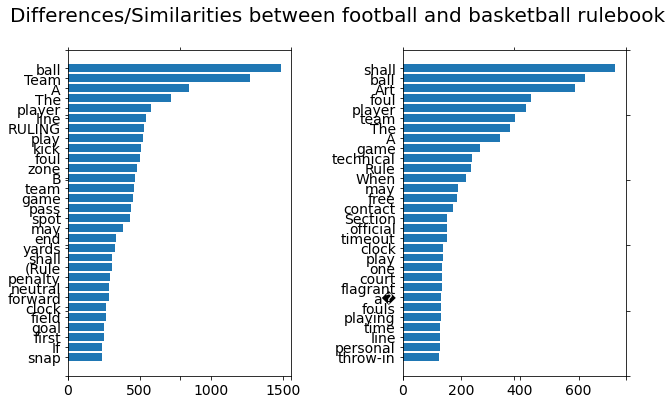

In [10]:
            
wfs_football = sorted (wf_football .items(), key = operator .itemgetter (1), reverse=True)   
wfs_basketball = sorted (wf_basketball .items(), key = operator .itemgetter (1), reverse=True)

football_list = (wfs_football[0:min(len(wfs_football),30)] [::-1])
basketball_list = (wfs_basketball[0:min(len(wfs_basketball),30)] [::-1])

plotTwoLists(football_list, basketball_list, 'Differences/Similarities between football and basketball rulebook')

# My Results

By running the code above, you can see the two different graphs that show the most frequently used words in the football rulebook and the basketball rulebook.

## Similarities

* 'Ball' is the most used word in football and second most used word in basketball
* Both use words like 'team' and 'player' quite often, showing both sports have players part of a team.
* Both use the word 'foul' frequently, showing a player can get a foul in both sports.
* 'Game' is used often by both
* Both rulebooks use 'shall' and 'may' very often. These must be common words used in rulebooks across all sports.
* Both use 'clock' often, showing both sports use a clock.

## Differences

* Football rulebook uses 'field' and basketball rulebook uses 'court'
* 'Shall' and 'may' seem to be used more often in the basketball rulebook
* Basketball rulebook uses 'official' frequently, while football rulebook does not reference any kind of official or referee as often
* Football rulebook uses 'pass' often, while basketball rulebook does not even though both sports involve passing.
* There are multiple frequent words in each rulebook the only pertain to that specific sport.